### Feature Selection

#### By Intuition

Feature selection using just domain knowledge from the telecom industry

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

pd.set_option('display.max_columns', None)

In [3]:
# Load cleaned churn data

churn_data = pd.read_csv("churn_data_clean.csv")
churn_data

,CustomerID,Age,NPS,account_age_days,age_group,total_purchase_value,total_frequency,product_diversity,Plan,subscription_duration_days,...,ChurnLabel,customer_segment,Gender_Female,Gender_Male,Segment_Segment A,Segment_Segment B,Segment_Segment C,nps_category_Detractor,nps_category_Passive,nps_category_Promoter
0,1001,31,3,1069,0,3994.72,38,7,2689.622546,871,...,1,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1002,66,6,1455,2,2844.35,4,3,2828.649426,290,...,0,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1003,36,3,1341,1,1866.52,14,3,2790.271692,319,...,0,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1004,62,1,1033,2,1378.64,28,5,2905.696003,803,...,1,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1005,68,3,1366,2,2425.05,39,6,2714.759176,580,...,0,1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12478,13479,55,8,338,2,1196.56,14,3,2790.271692,745,...,0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
12479,13480,29,7,930,0,710.57,1,1,2859.778143,18,...,0,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
12480,13481,38,1,809,1,5154.42,63,10,2723.138567,20,...,1,1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
12481,13482,26,0,920,0,6055.16,58,9,2816.218537,484,...,0,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [4]:
churn_data.columns.to_list()

['CustomerID',
 'Age',
 'NPS',
 'account_age_days',
 'age_group',
 'total_purchase_value',
 'total_frequency',
 'product_diversity',
 'Plan',
 'subscription_duration_days',
 'subscription_age_days',
 'is_active',
 'last_interaction_date',
 'total_interactions',
 'total_late_payments',
 'payment_count',
 'late_payment_rate',
 'payment_risk_score',
 'PageViews',
 'TimeSpent(minutes)',
 'engagement_ratio',
 'engagement_intensity',
 'total_actions',
 'add_to_cart_count',
 'search_count',
 'click_count',
 'unique_pages',
 'cart_conversion_rate',
 'search_intensity',
 'page_diversity',
 'Logins',
 'frequency_score',
 'engagement_score',
 'avg_rating',
 'avg_comment_length',
 'sentiment_score',
 'is_negative',
 'is_positive',
 'emails_sent',
 'emails_opened',
 'emails_clicked',
 'open_rate',
 'click_rate',
 'click_through_rate',
 'marketing_engagement',
 'ChurnLabel',
 'customer_segment',
 'Gender_Female',
 'Gender_Male',
 'Segment_Segment A',
 'Segment_Segment B',
 'Segment_Segment C',
 'nps

In [5]:
X = churn_data[
    [
        "age_group",
        "total_purchase_value",
        "total_frequency",
        "total_purchase_value",
        "late_payment_rate",
        "frequency_score",
        "engagement_score",
        "sentiment_score",
        "is_negative",
        "nps_category_Detractor",
        "nps_category_Passive",
        "nps_category_Promoter",
        "customer_segment",
        "Gender_Female",
        "Gender_Male",
    ]
]

y = churn_data["ChurnLabel"]

In [6]:
# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
X.select_dtypes(include=["object", "category"])

""
0
1
2
3
4
...
12478
12479
12480
12481


In [8]:
# Scale features

sc = StandardScaler()

X_train_s = sc.fit_transform(X_train)
X_test_s = sc.transform(X_test)

In [9]:
# Train model

model = LogisticRegression()
model.fit(X_train_s, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [10]:
# Make predictions

y_pred = model.predict(X_test_s)

In [11]:
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.3f}\n")
print(classification_report(y_test, y_pred))

Accuracy:  0.960

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1262
           1       0.97      0.95      0.96      1235

    accuracy                           0.96      2497
   macro avg       0.96      0.96      0.96      2497
weighted avg       0.96      0.96      0.96      2497



#### Feature Selection using Mutual Information

In [15]:
churn_data

,CustomerID,Age,NPS,account_age_days,age_group,total_purchase_value,total_frequency,product_diversity,Plan,subscription_duration_days,subscription_age_days,is_active,last_interaction_date,total_interactions,total_late_payments,payment_count,late_payment_rate,payment_risk_score,PageViews,TimeSpent(minutes),engagement_ratio,engagement_intensity,total_actions,add_to_cart_count,search_count,click_count,unique_pages,cart_conversion_rate,search_intensity,page_diversity,Logins,frequency_score,engagement_score,avg_rating,avg_comment_length,sentiment_score,is_negative,is_positive,emails_sent,emails_opened,emails_clicked,open_rate,click_rate,click_through_rate,marketing_engagement,ChurnLabel,customer_segment,Gender_Female,Gender_Male,Segment_Segment A,Segment_Segment B,Segment_Segment C,nps_category_Detractor,nps_category_Passive,nps_category_Promoter
0,1001,31,3,1069,0,3994.72,38,7,2689.622546,871,937,0,2021-07-25,4,40,3,10.00,400.00,49,15,0.300000,735,24,8,12,4,13,0.320000,0.480000,0.520000,19,4,76,1.0,96.0,0.2,1,0,8,8,8,0.888889,0.888889,0.888889,0.790123,1,0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,1002,66,6,1455,2,2844.35,4,3,2828.649426,290,529,0,2022-12-13,19,10,3,2.50,25.00,100,9,0.089109,900,24,8,7,9,13,0.320000,0.280000,0.520000,9,4,36,2.0,108.0,0.4,1,0,9,9,9,0.900000,0.900000,0.900000,0.810000,0,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
2,1003,36,3,1341,1,1866.52,14,3,2790.271692,319,1184,0,2022-01-04,3,8,3,2.00,16.00,1,97,48.500000,97,12,2,7,3,7,0.153846,0.538462,0.538462,19,1,19,4.0,72.0,0.8,0,1,8,8,8,0.888889,0.888889,0.888889,0.790123,0,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1004,62,1,1033,2,1378.64,28,5,2905.696003,803,1083,0,2022-11-10,59,79,3,19.75,1560.25,25,31,1.192308,775,47,15,16,16,14,0.312500,0.333333,0.291667,4,30,120,1.0,78.0,0.2,1,0,10,10,10,0.909091,0.909091,0.909091,0.826446,1,0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1005,68,3,1366,2,2425.05,39,6,2714.759176,580,633,0,2022-12-19,10,2,3,0.50,1.00,77,51,0.653846,3927,30,17,4,9,12,0.548387,0.129032,0.387097,12,4,48,3.0,99.0,0.6,0,0,7,7,7,0.875000,0.875000,0.875000,0.765625,0,1,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12478,13479,55,8,338,2,1196.56,14,3,2790.271692,745,1296,0,2022-10-09,10,3,3,0.75,2.25,70,57,0.802817,3990,6,4,1,1,6,0.571429,0.142857,0.857143,22,30,660,2.0,37.0,0.4,1,0,4,4,4,0.800000,0.800000,0.800000,0.640000,0,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
12479,13480,29,7,930,0,710.57,1,1,2859.778143,18,22,0,2022-11-05,3,6,3,1.50,9.00,71,66,0.916667,4686,9,3,3,3,8,0.300000,0.300000,0.800000,25,4,100,3.0,102.0,0.6,0,0,7,7,7,0.875000,0.875000,0.875000,0.765625,0,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
12480,13481,38,1,809,1,5154.42,63,10,2723.138567,20,546,0,2022-12-08,26,83,3,20.75,1722.25,96,1,0.010309,96,26,10,11,5,9,0.370370,0.407407,0.333333,9,1,9,5.0,134.0,1.0,0,1,5,5,5,0.833333,0.833333,0.833333,0.694444,1,1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
12481,13482,26,0,920,0,6055.16,58,9,2816.218537,484,894,0,2022-11-15,13,67,3,16.75,1122.25,63,2,0.031250,126,38,7,15,16,12,0.179487,0.384615,0.307692,2,1,2,5.0,113.0,1.0,0,1,1,1,1,0.500000,0.500000,0.500000,0.250000,0,1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [21]:
churn_data['last_interaction_date'] = pd.to_datetime(churn_data['last_interaction_date'])

date_cols = ['last_interaction_date']

for col in date_cols:
    churn_data[col + '_year'] = churn_data[col].dt.year
    churn_data[col + '_month'] = churn_data[col].dt.month
    churn_data[col + '_day'] = churn_data[col].dt.day
    
    churn_data.drop(columns=[col], inplace=True)

In [40]:
mutual_data = churn_data.copy()

target = mutual_data['ChurnLabel']
features = mutual_data.drop(columns = ['CustomerID', 'ChurnLabel'])

mi_scores = mutual_info_classif(features, target)

In [41]:
mi_scores = pd.DataFrame({
    'Features': features.columns,
    'Scores': mi_scores
})

mi_scores

,Features,Scores
0,Age,0.000000
1,NPS,0.234438
2,account_age_days,0.000000
3,age_group,0.000000
4,total_purchase_value,0.002157
5,total_frequency,0.000000
6,product_diversity,0.000000
7,Plan,0.000000
8,subscription_duration_days,0.002625
9,subscription_age_days,0.000727


In [58]:
mi_scores_sorted = mi_scores.sort_values('Scores', ascending=False).iloc[:20]

<Axes: ylabel='Features'>

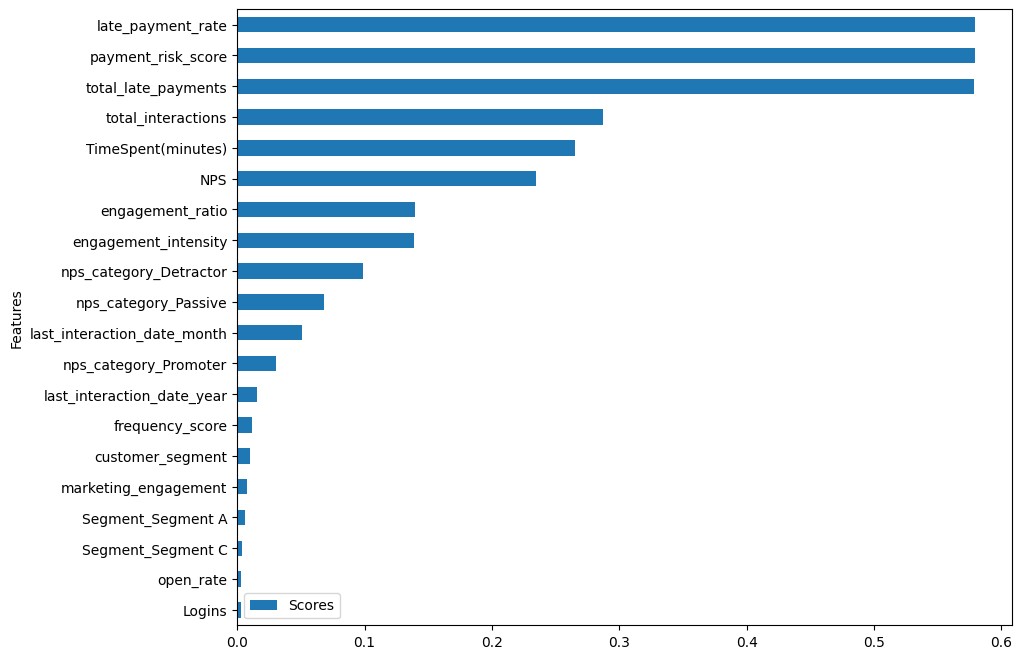

In [83]:
import matplotlib.pyplot as plt
top_20_features = mi_scores_sorted.iloc[::-1]
top_20_features.plot('Features', 'Scores', kind='barh', figsize=(10,8))

#### Training Model

In [68]:
train_data = churn_data[top_20_features['Features'].to_list()]

In [69]:
train_data

,Logins,open_rate,Segment_Segment C,Segment_Segment A,marketing_engagement,customer_segment,frequency_score,last_interaction_date_year,nps_category_Promoter,last_interaction_date_month,nps_category_Passive,nps_category_Detractor,engagement_intensity,engagement_ratio,NPS,TimeSpent(minutes),total_interactions,total_late_payments,payment_risk_score,late_payment_rate
0,19,0.888889,0.0,0.0,0.790123,0,4,2021,0.0,7,0.0,1.0,735,0.300000,3,15,4,40,400.00,10.00
1,9,0.900000,1.0,0.0,0.810000,0,4,2022,0.0,12,0.0,1.0,900,0.089109,6,9,19,10,25.00,2.50
2,19,0.888889,0.0,0.0,0.790123,0,1,2022,0.0,1,0.0,1.0,97,48.500000,3,97,3,8,16.00,2.00
3,4,0.909091,1.0,0.0,0.826446,0,30,2022,0.0,11,0.0,1.0,775,1.192308,1,31,59,79,1560.25,19.75
4,12,0.875000,1.0,0.0,0.765625,1,4,2022,0.0,12,0.0,1.0,3927,0.653846,3,51,10,2,1.00,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12478,22,0.800000,0.0,1.0,0.640000,0,30,2022,0.0,10,1.0,0.0,3990,0.802817,8,57,10,3,2.25,0.75
12479,25,0.875000,0.0,1.0,0.765625,0,4,2022,0.0,11,1.0,0.0,4686,0.916667,7,66,3,6,9.00,1.50
12480,9,0.833333,1.0,0.0,0.694444,1,1,2022,0.0,12,0.0,1.0,96,0.010309,1,1,26,83,1722.25,20.75
12481,2,0.500000,0.0,1.0,0.250000,1,1,2022,0.0,11,0.0,1.0,126,0.031250,0,2,13,67,1122.25,16.75


In [70]:
X = train_data
y = churn_data['ChurnLabel']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [74]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

c:\Users\brigh\Documents\amdari-internship\projects\reder-analytics\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [75]:
y_pred = lr.predict(X_test)

In [76]:
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.3f}\n")
print(classification_report(y_test, y_pred))

Accuracy:  0.971

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1262
           1       0.97      0.97      0.97      1235

    accuracy                           0.97      2497
   macro avg       0.97      0.97      0.97      2497
weighted avg       0.97      0.97      0.97      2497



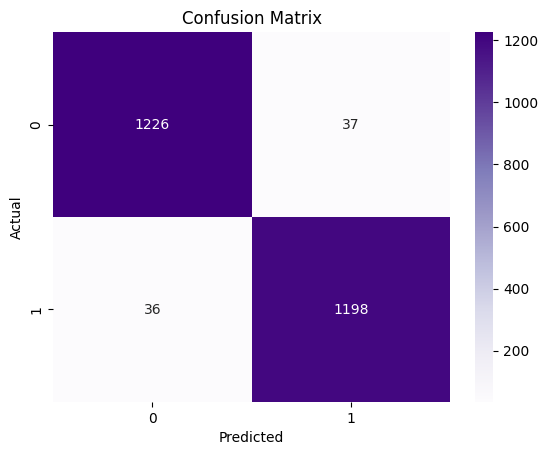

In [84]:
import seaborn as sns

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Hyperparameter Tuning using RandomizedSearch